# Instalaciones e Importaciones

In [1]:
!pip install xgboost

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 23.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math

mpl.style.use("ggplot")

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek
import joblib

# Creacion Pipeline

In [5]:
datapipeline = pd.read_csv("/content/Student_performance_data _.csv")

In [11]:
datapipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
esc = ['Age', 'StudyTimeWeekly', 'Absences', 'ParentalEducation', 'ParentalSupport']
bin = ['Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
cod = ['Ethnicity']

In [7]:
data_train, data_test = train_test_split(datapipeline, test_size=0.2, random_state=8)

In [9]:
x_train = data_train.drop(columns=['GradeClass','StudentID','GPA'])
y_train = data_train['GradeClass']

In [12]:
x_test = data_test.drop(columns=['GradeClass','StudentID','GPA'])
y_test = data_test['GradeClass']

In [13]:
smotedata_train = SMOTETomek(random_state=8)
x_trains, y_trains = smotedata_train.fit_resample(x_train, y_train)

In [14]:
preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), esc),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cod),
    ('bin', 'passthrough', bin)])

In [15]:
xgbfinal = XGBClassifier(random_state=8, colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8)

In [16]:
pipelinexgb = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('modelo', xgbfinal)])

In [17]:
pipelinexgb.fit(x_trains, y_trains)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'StudyTimeWeekly',
                                                   'Absences',
                                                   'ParentalEducation',
                                                   'ParentalSupport']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Ethnicity']),
                                                 ('bin', 'passthrough',
                                                  ['Gender', 'Tutoring',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('modelo',
                 X...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [18]:
y_pred = pipelinexgb.predict(x_test)

Accuracy: 0.7056
F1 Macro: 0.5953

Reporte por clase:

              precision    recall  f1-score   support

         0.0       0.44      0.48      0.46        23
         1.0       0.51      0.53      0.52        53
         2.0       0.62      0.53      0.57        90
         3.0       0.51      0.58      0.54        81
         4.0       0.89      0.88      0.89       232

    accuracy                           0.71       479
   macro avg       0.59      0.60      0.60       479
weighted avg       0.71      0.71      0.71       479



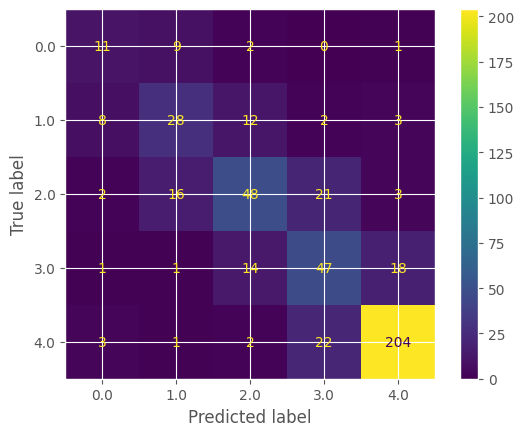

In [21]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Macro: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\nReporte por clase:\n")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [20]:
joblib.dump(pipelinexgb, 'xgb_pipeline_final.pkl')

['xgb_pipeline_final.pkl']

In [ ]:
modelo = joblib.load('modelo_xgb_pipeline.pkl')
pred = modelo.predict(nuevos_datos)

# Prueba

In [26]:
!pip install fastapi uvicorn nest-asyncio pyngrok

In [28]:
from pyngrok import ngrok

# Conectar ngrok con tu cuenta
ngrok.set_auth_token("2z7fXSKiBmQzjRsVF4NwbkEPzfz_3gp8C1ZDPHUcX1U5BLoRM")

In [29]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd
import nest_asyncio
from pyngrok import ngrok
import uvicorn

# Aplicar parche para correr async event loop en Colab
nest_asyncio.apply()

# Cargar modelo
modelo = joblib.load('xgb_pipeline_final.pkl')

# Crear app
app = FastAPI()

# Clase de entrada (ajústala a tus columnas)
class InputData(BaseModel):
    Age: float
    StudyTimeWeekly: float
    Absences: int
    ParentalEducation: int
    ParentalSupport: int
    Gender: int
    Tutoring: int
    Extracurricular: int
    Sports: int
    Music: int
    Volunteering: int
    Ethnicity: int

@app.post("/predict")
def predict(data: InputData):
    df = pd.DataFrame([data.dict()])
    pred = modelo.predict(df)
    return {"prediction": int(pred[0])}

# Abrir túnel público a Colab
public_url = ngrok.connect(8000)
print("Tu API está disponible en:", public_url)

# Ejecutar servidor
uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [1832]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


Tu API está disponible en: NgrokTunnel: "https://9925-34-145-19-174.ngrok-free.app" -> "http://localhost:8000"
INFO:     191.109.100.115:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     191.109.100.115:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     191.109.100.115:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     191.109.100.115:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     191.109.100.115:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     191.109.100.115:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     191.109.100.115:0 - "POST /predict HTTP/1.1" 200 OK


/tmp/ipython-input-29-4099504701.py:35: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  df = pd.DataFrame([data.dict()])
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1832]
